# ETL Y EDA PURCHASES FINAL 2016

In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el archivo csv y nombramos dataset
PurchasesFinal = pd.read_csv("PurchasesFINAL12312016.csv")

In [3]:
#Informacion el dataset
PurchasesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [4]:
#Primeras filas
PurchasesFinal.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [5]:
#Verificamos la cantidad de datos nulos por columna
#Como en los demas archivos la columna Size presenta nulos y necesita conversion de los valores para SizeMl
print(PurchasesFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [6]:
# Verificamos y contamos el número de filas duplicadas en una sola línea
filas_duplicadas = PurchasesFinal.duplicated().sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Compras: {filas_duplicadas}')

# Si hay filas duplicadas, las mostramos
if filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Compras:")
    print(PurchasesFinal[PurchasesFinal.duplicated()])

Número de filas duplicadas en la tabla Compras: 0


In [7]:
#Estadisticas de cada columna
for i in PurchasesFinal.columns:
    print(i)
    #Esto imprime las estadísticas descriptivas (como count, mean, std, min, 25%, 50%, 75%, max) para esa columna.
    print(PurchasesFinal[i].describe())
    print('--------------------------------------------------------------')

InventoryId
count               2372474
unique               245907
top       73_DONCASTER_8068
freq                    180
Name: InventoryId, dtype: object
--------------------------------------------------------------
Store
count    2.372474e+06
mean     4.465133e+01
std      2.351245e+01
min      1.000000e+00
25%      2.500000e+01
50%      4.800000e+01
75%      6.700000e+01
max      8.100000e+01
Name: Store, dtype: float64
--------------------------------------------------------------
Brand
count    2.372474e+06
mean     1.241864e+04
std      1.255728e+04
min      5.800000e+01
25%      3.639000e+03
50%      6.523000e+03
75%      1.887700e+04
max      9.063100e+04
Name: Brand, dtype: float64
--------------------------------------------------------------
Description
count                   2372474
unique                     9652
top       Tito's Handmade Vodka
freq                      16442
Name: Description, dtype: object
-------------------------------------------------------------

In [9]:
# Verificamos si hay valores negativos en las columnas numéricas
negativos = PurchasesFinal.select_dtypes(include='number').columns[
    (PurchasesFinal.select_dtypes(include='number') < 0).any()].tolist()

# Imprimimos los resultados
if negativos:
    print(f"Columnas con valores negativos: {negativos}")
    for column in negativos:
        print(f"\nValores negativos en la columna '{column}':")
        print(PurchasesFinal[PurchasesFinal[column] < 0])
else:
    print("No se encontraron valores negativos")


No se encontraron valores negativos


In [12]:
# Convertimos las columnas que tienen dato fecha al formato correcto

# Listamos las columnas a convertir
columnas_fecha = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']

# Convertimos las columnas a formato datetime con un ciclo For
for col in columnas_fecha:
    PurchasesFinal[col] = pd.to_datetime(PurchasesFinal[col], errors='coerce')

# Imprimimos para verificar los tipos de datos después de la conversión
print(PurchasesFinal.dtypes)

# Verificamos la cantidad de valores nulos en las columnas de fecha
print(PurchasesFinal[columnas_fecha].isnull().sum())

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object
PODate           0
ReceivingDate    0
InvoiceDate      0
PayDate          0
dtype: int64


In [13]:
PurchasesFinal['Size']

0          750mL
1          1.75L
2          1.75L
3          1.75L
4          750mL
           ...  
2372469    750mL
2372470    750mL
2372471    750mL
2372472    750mL
2372473    750mL
Name: Size, Length: 2372474, dtype: object

In [15]:
#Como en los demas archivos se encuestra la misma convercion de la columna Size, creando SizeMl
import re

def convertir_a_ml(size):
    # Expresión regular para extraer el número principal, unidad y posibles cantidades de paquetes
    match = re.match(r"(\d+(\.\d+)?)\s*(mL|L|liter|oz)?(?:\s*(\d+)?\s*Pk)?", str(size), re.IGNORECASE)
    
    if match:
        valor = float(match.group(1))  # Valor numérico principal
        unidad = match.group(3).lower() if match.group(3) else ''  # Unidad de medida
        cantidad_pk = int(match.group(4)) if match.group(4) else 1  # Cantidad en el paquete, por defecto 1
        
        # Convertir a mililitros según la unidad
        if unidad in ['l', 'liter']:
            return valor * 1000 * cantidad_pk  # Convertir litros a mililitros y multiplicar por cantidad
        elif unidad == 'oz':
            return valor * 29.5735 * cantidad_pk  # Convertir onzas a mililitros y multiplicar por cantidad
        elif unidad == 'ml':
            return valor * cantidad_pk  # Ya está en mililitros, multiplicar por cantidad
    return None

# Aplicar la función a la columna 'Size' para crear la columna 'Size_ml' en mL
PurchasesFinal['SizeMl'] = PurchasesFinal['Size'].apply(convertir_a_ml)

# Verificar el resultado
print(PurchasesFinal[['Size', 'SizeMl']].head(10))

    Size  SizeMl
0  750mL   750.0
1  1.75L  1750.0
2  1.75L  1750.0
3  1.75L  1750.0
4  750mL   750.0
5  1.75L  1750.0
6  750mL   750.0
7  200mL   200.0
8  750mL   750.0
9  1.75L  1750.0


In [16]:
# Eliminar filas donde 'SizeMl' tiene valores NaN
PurchasesFinal = PurchasesFinal.dropna(subset=['SizeMl'])

# Verificar el resultado
print(PurchasesFinal['SizeMl'].unique())


[  750.      1750.       200.      1500.        50.       375.
   100.      3000.       748.      1000.       500.       187.
   400.      5000.      4000.       561.       250.       180.
   800.       147.8675 18000.       300.       720.       150.
   330.      2250.       600.      1125.       650.617   6000.
 20000.       374.     19500.      4500.      9000.    ]


In [17]:
#Borramos la columna Size

del PurchasesFinal['Size']

In [20]:
#Verificamos la cantidad de datos faltantes por columna
print(PurchasesFinal.isnull().sum())

InventoryId       0
Store             0
Brand             0
Description       0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
SizeMl            0
dtype: int64


In [21]:
#Tablas atomicas
#Contar la cantidad de pedidos por tienda
pedidos_tienda = PurchasesFinal['Store'].value_counts().reset_index()
pedidos_tienda.columns = ['Tienda', 'Cantidad de Pedidos']

# Seleccionar las 10 tiendas con mayor cantidad de pedidos
top_tiendas = pedidos_tienda.head(10)

# Mostrar la tabla de las 10 tiendas con mayor cantidad de pedidos
print("Tiendas con Mayor Cantidad de Pedidos:")
print(top_tiendas)


Tiendas con Mayor Cantidad de Pedidos:
   Tienda  Cantidad de Pedidos
0      76               119619
1      73                95611
2      38                92158
3      34                90321
4      66                81520
5      67                68483
6      50                64334
7      69                62250
8      60                57249
9      41                52462


In [22]:
PurchasesFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2324824 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   VendorNumber    int64         
 5   VendorName      object        
 6   PONumber        int64         
 7   PODate          datetime64[ns]
 8   ReceivingDate   datetime64[ns]
 9   InvoiceDate     datetime64[ns]
 10  PayDate         datetime64[ns]
 11  PurchasePrice   float64       
 12  Quantity        int64         
 13  Dollars         float64       
 14  Classification  int64         
 15  SizeMl          float64       
dtypes: datetime64[ns](4), float64(3), int64(6), object(3)
memory usage: 301.5+ MB


In [23]:
#Tabla con las compras mas grandes
top_compras = PurchasesFinal[['Brand', 'Description', 'PurchasePrice']].nlargest(10, 'PurchasePrice').reset_index(drop=True)
print("Compras mas grandes:")
print(top_compras)


Compras mas grandes:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1   3949     Patron En Lalique Tequila        5681.81
2   3949     Patron En Lalique Tequila        5681.81
3    423       Hennessy Richard Cognac        3352.93
4    423       Hennessy Richard Cognac        3352.93
5    423       Hennessy Richard Cognac        3352.93
6   8385  Glenfiddich 1978 Rare Collct        2713.17
7   1251  Port Ellen 32 Yr Single Malt        2661.86
8   1251  Port Ellen 32 Yr Single Malt        2661.86
9   1251  Port Ellen 32 Yr Single Malt        2661.86


In [26]:
#Se crea una copia del dataframe para el análisis
PurchasesFinal_copy_1 = PurchasesFinal.copy()

# Verificar duplicados en la copia
print("Duplicados en la copia:")
print(PurchasesFinal_copy_1[['Brand', 'Description', 'PurchasePrice']].duplicated().sum())

# Eliminar duplicados solo en la copia para el análisis del top 10
PurchasesFinal_copy_1 = PurchasesFinal_copy_1[['Brand', 'Description', 'PurchasePrice']].drop_duplicates()

#Tabla con los productos más costosos de la copia
top_costosos = PurchasesFinal_copy_1.nlargest(10, 'PurchasePrice').reset_index(drop=True)

print("Productos Más Costosos:")
print(top_costosos)

Duplicados en la copia:
2314532
Productos Más Costosos:
   Brand                   Description  PurchasePrice
0   3949     Patron En Lalique Tequila        5681.81
1    423       Hennessy Richard Cognac        3352.93
2   8385  Glenfiddich 1978 Rare Collct        2713.17
3   1251  Port Ellen 32 Yr Single Malt        2661.86
4   5795  Courvoisier L'Essence Cognac        2518.51
5    500        Remy Martin Louis XIII        2290.07
6   4109     Hennessy Paradis Imperial        2109.37
7   1176   Brora 37 Yr Old Single Malt        1574.80
8   1300     Ladyburn 41 Yr Old Scotch        1550.38
9  20063       Ch Cheval Blanc 10 Brdx        1456.95


In [27]:
#Contamos cuantas celdas hay con precio=0 en la columna "Purchaseprice"
zero_price= (PurchasesFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {zero_price}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 153


In [29]:
# Filtramos las filas donde 'PurchasePrice' es igual a 0
precio_cero = PurchasesFinal[PurchasesFinal['PurchasePrice'] == 0]

# Verificar si son el mismo producto 
productos_price_cero = precio_cero.groupby(['Description', 'Brand', 'VendorNumber']).size().reset_index(name='count')

#Imprimimos
print(productos_price_cero)

                   Description  Brand  VendorNumber  count
0  The Macallan Double Cask 12   2166          2561    153


In [30]:
# Verificamos las filas que contienen "The Macallan Double Cask 12" en la columna Description
filtrado_fila = PurchasesFinal['Description'].str.contains("The Macallan Double Cask 12", na=False)

# Filas antes de la actualización
print("\nFilas antes de la actualización:")
print(PurchasesFinal[filtrado_fila])

# Calculamos el valor medio de la columna PurchasePrice
mean_purchase_price = round(PurchasesFinal['PurchasePrice'].mean(), 2)
print(f"\nValor medio de PurchasePrice: {mean_purchase_price}")

# Reemplazamos los valores en PurchasePrice para "The Macallan Double Cask 12" con el valor medio
PurchasesFinal.loc[filtrado_fila, 'PurchasePrice'] = mean_purchase_price

# Verificamos las filas que contienen "The Macallan Double Cask 12" después del reemplazo
print("\nFilas después de la actualización:")
print(PurchasesFinal[filtrado_fila])


Filas antes de la actualización:
                   InventoryId  Store  Brand                  Description  \
1369009    59_CLAETHORPES_2166     59   2166  The Macallan Double Cask 12   
1369018      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
1369031      34_PITMERDEN_2166     34   2166  The Macallan Double Cask 12   
1369032     44_PORTHCRAWL_2166     44   2166  The Macallan Double Cask 12   
1369033  56_BEGGAR'S HOLE_2166     56   2166  The Macallan Double Cask 12   
...                        ...    ...    ...                          ...   
2278896     39_EASTHALLOW_2166     39   2166  The Macallan Double Cask 12   
2278909      38_GOULCREST_2166     38   2166  The Macallan Double Cask 12   
2278922       9_BLACKPOOL_2166      9   2166  The Macallan Double Cask 12   
2278954    20_BREDWARDINE_2166     20   2166  The Macallan Double Cask 12   
2278958        31_HORNSEY_2166     31   2166  The Macallan Double Cask 12   

         VendorNumber                   V

In [31]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Purchaseprice para confirmar los cambios
precio_cero = (PurchasesFinal['PurchasePrice'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna 'PurchasePrice' es : {precio_cero}")

Número de celdas con precio=0 en la columna 'PurchasePrice' es : 0


In [32]:
# Contamos el número de proveedores únicos por producto
multiple_vendors = (
    PurchasesFinal
    .groupby(['Description', 'Brand'])['VendorNumber']
    .nunique()
    .reset_index(name='UniqueVendorCount')
)

# Filtramos productos que tienen más de un proveedor
multiple_vendors = multiple_vendors[multiple_vendors['UniqueVendorCount'] > 1]

# Imprimimos los resultados
print(multiple_vendors)


                       Description  Brand  UniqueVendorCount
902   Benton Lane Pnt Gris Willamt  42801                  2
903         Benton Lane Pnt Nr Ore  31384                  2
991                Big Peat Scotch   2717                  2
2502            Chocolate Shop Red  17754                  2
2535  Cigar Zin Old Vine Zinfandel  18771                  2
2808      Corner Creek Rsv Bourbon   2879                  2
4982   Jaboulet Cotes du Rhone Par   6692                  2
4984  Jaboulet Crozes Herm 10 Thal  11259                  2
4985   Jaboulet Crozes Hermitage L  26889                  2
4986  Jaboulet Cts Rhone Parl Rose  11089                  2
5808       Le Grande Courtage Brut  21860                  2
5809       Le Grande Courtage Brut  21959                  2
5811       Le Grande Courtage Rose  21960                  2
5924                 Linie Aquavit   5322                  2
6163  Magnificent Wine Co House Re  42735                  2
8564                  Si

In [34]:
#Creamos index para primarykey valores incrementales desde 1
PurchasesFinal['PurchasesFinalID'] = range(1, len(PurchasesFinal) + 1)

PurchasesFinal.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12388\1103164796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PurchasesFinal['PurchasesFinalID'] = range(1, len(PurchasesFinal) + 1)


,InventoryId,Store,Brand,Description,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,SizeMl,PurchasesFinalID
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,750.0,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,1750.0,2
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,1750.0,3
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,1750.0,4
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,750.0,5


Top 10 Productos Más Comprados:
   Brand                   Description  PurchasePrice  Quantity
0   8111             Smirnoff 80 Proof           0.77    337660
1   1892                    Yukon Jack           0.72    254824
2   5111  Dr McGillicuddy's Mentholmnt           0.72    244654
3   3606      Smirnoff Raspberry Vodka           0.74    226085
4   6570  Kendall Jackson Chard Vt RSV           6.77    215668
5   4261        Capt Morgan Spiced Rum          16.17    201682
6   8068              Absolut 80 Proof          18.24    187407
7   3405         Tito's Handmade Vodka          23.19    164038
8   3837                    Skyy Vodka           0.72    163375
9   3102             Smirnoff Traveler          12.94    161386


C:\Users\Admin\AppData\Local\Temp\ipykernel_12388\302808488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


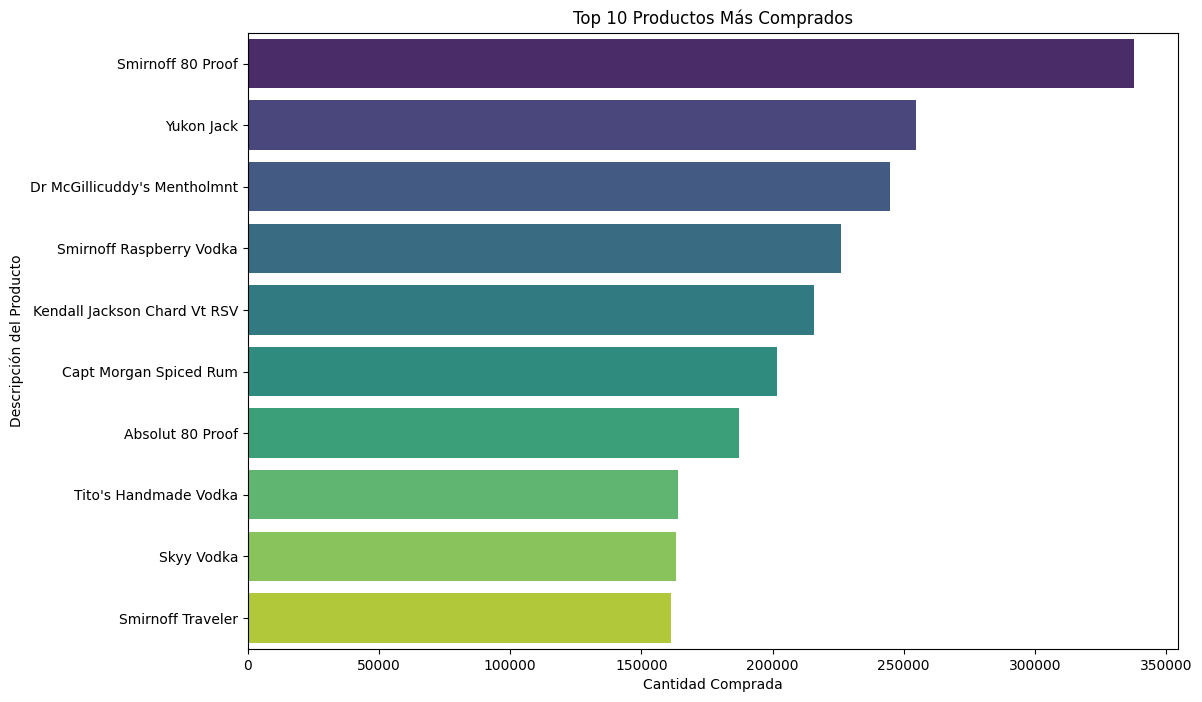

In [35]:
#Creamos graficos para los productos mas relevantes
top_productos = (
    PurchasesFinal
    .groupby(['Brand', 'Description', 'PurchasePrice'])['Quantity']
    .sum()
    .nlargest(10)
    .reset_index()
)
print("Top 10 Productos Más Comprados:")
print(top_productos)

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Quantity', 
    y='Description', 
    data=top_productos,
    palette='viridis'
)
plt.title('Top 10 Productos Más Comprados')
plt.xlabel('Cantidad Comprada')
plt.ylabel('Descripción del Producto')
plt.show()

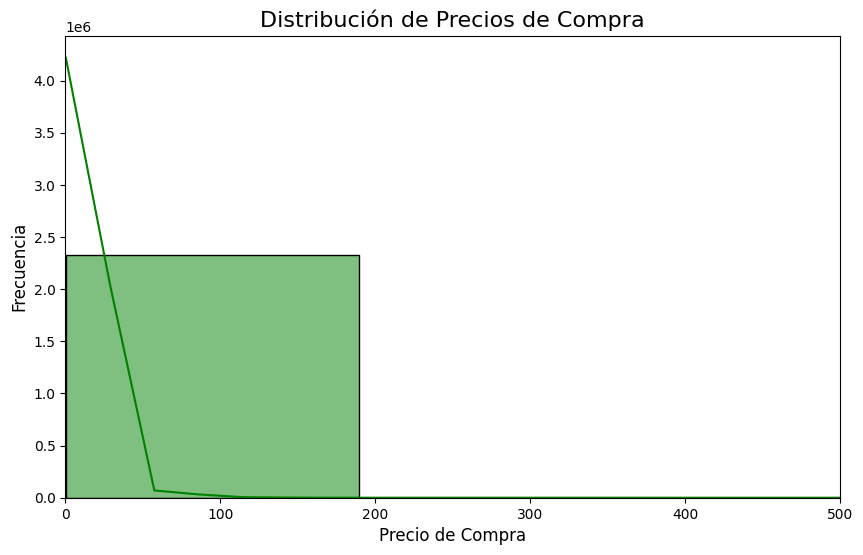

In [36]:
#Creamos un histograma de precios de compra indicando que van de 0 a 190
plt.figure(figsize=(10, 6))
sns.histplot(PurchasesFinal['PurchasePrice'], bins=30, kde=True, color='green')
plt.title('Distribución de Precios de Compra', fontsize=16)
plt.xlabel('Precio de Compra', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 500)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12388\978853551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')


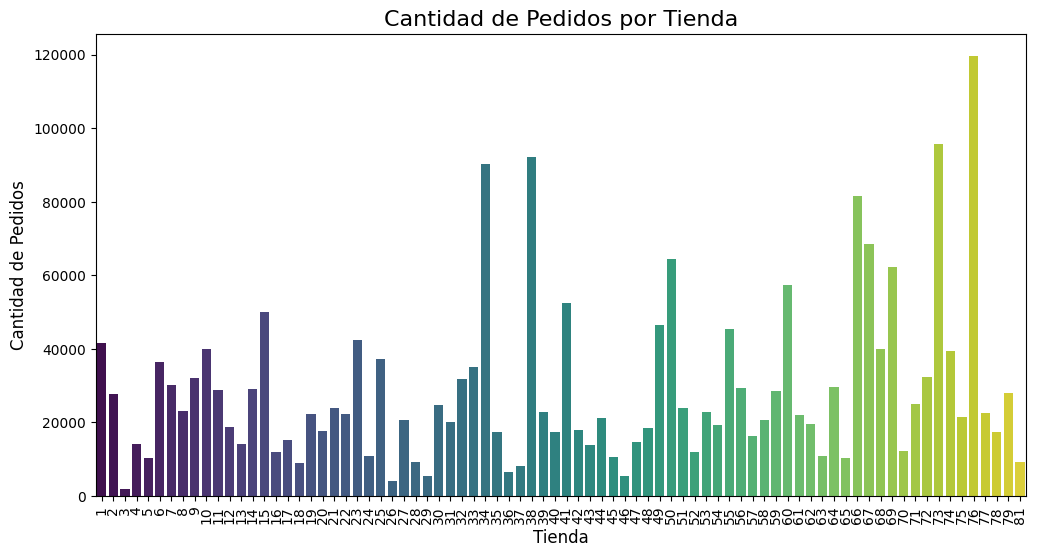

In [37]:
#Creamos grafico Barplot de la cantidad de pedidos por Store
plt.figure(figsize=(12, 6))
store_order_counts = PurchasesFinal['Store'].value_counts()
sns.barplot(x=store_order_counts.index, y=store_order_counts.values, palette='viridis')
plt.title('Cantidad de Pedidos por Tienda', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Cantidad de Pedidos', fontsize=12)
plt.show()


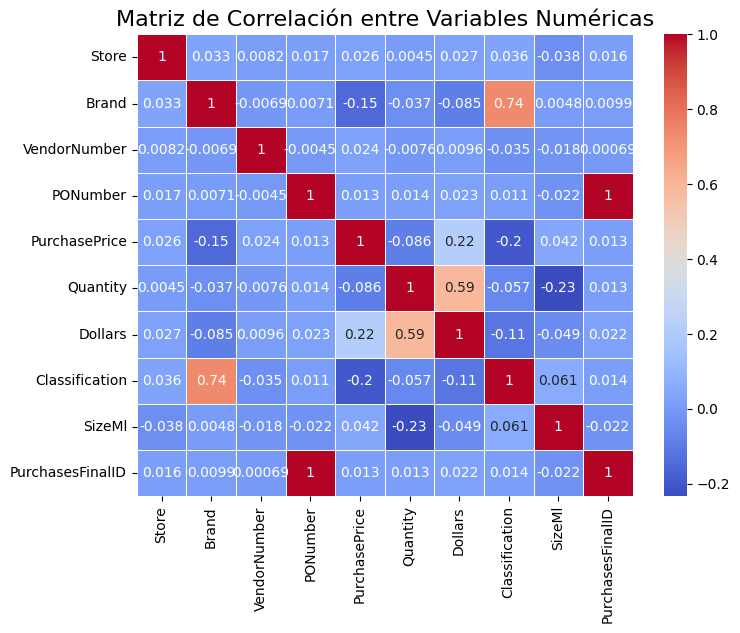

In [38]:
#Creamos una matriz para Filtrar solo las columnas numéricas para la correlación
column_numeric = PurchasesFinal.select_dtypes(include='number')

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(column_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()


In [46]:
PurchasesFinal.head()

,PurchasesFinalID,InventoryId,Store,Brand,Description,VendorNumber,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,SizeMl
0,1,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,105,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,750.0
1,2,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,4466,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,1750.0
2,3,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,4466,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,1750.0
3,4,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,4466,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,1750.0
4,5,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,388,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,750.0


In [41]:
#Se borra la columna VendorName para alivianar el dataframe
del PurchasesFinal['VendorName']

In [47]:
PurchasesFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324824 entries, 0 to 2324823
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PurchasesFinalID  int64         
 1   InventoryId       object        
 2   Store             int64         
 3   Brand             int64         
 4   Description       object        
 5   VendorNumber      int64         
 6   PONumber          int64         
 7   PODate            datetime64[ns]
 8   ReceivingDate     datetime64[ns]
 9   InvoiceDate       datetime64[ns]
 10  PayDate           datetime64[ns]
 11  PurchasePrice     float64       
 12  Quantity          int64         
 13  Dollars           float64       
 14  Classification    int64         
 15  SizeMl            float64       
dtypes: datetime64[ns](4), float64(3), int64(7), object(2)
memory usage: 283.8+ MB


In [48]:
#Renombramos, Guardamos el dataframe en tipo csv y listo para normalizar.
PurchasesFinal = PurchasesFinal.rename(columns={
    'PurchasesFinalID':'PurchasesFinalID',
    'InventoryID': 'InventoryID',
    'Store': 'StoreID',
    'Brand': 'BrandID',
    'Description': 'Description',
    'VendorNumber': 'VendorID',
    'PONumber': 'PONumber',
    'PODate': 'PODate',
    'ReceivingDate':'ReceivingDate',
    'InvoiceDate':'InvoiceDate',
    'PayDate':'PayDate',
    'PurchasePrice':'PurchasePrice',
    'Quantity':'Quantity',
    'Dollars':'Price',
    'Classification': 'Classification', 
    'SizeMl': 'SizeMl'
    })
PurchasesFinal.info()
PurchasesFinal.to_csv (r"C:\Users\Admin\Desktop\proyecto final\Proceso\CSV listos\PurchasesFinal.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324824 entries, 0 to 2324823
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PurchasesFinalID  int64         
 1   InventoryId       object        
 2   StoreID           int64         
 3   BrandID           int64         
 4   Description       object        
 5   VendorID          int64         
 6   PONumber          int64         
 7   PODate            datetime64[ns]
 8   ReceivingDate     datetime64[ns]
 9   InvoiceDate       datetime64[ns]
 10  PayDate           datetime64[ns]
 11  PurchasePrice     float64       
 12  Quantity          int64         
 13  Price             float64       
 14  Classification    int64         
 15  SizeMl            float64       
dtypes: datetime64[ns](4), float64(3), int64(7), object(2)
memory usage: 283.8+ MB
